In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import random
import re
from sklearn.decomposition import KernelPCA


%matplotlib inline

#  Global Variables

In [2]:
seed = 2293687334
random.seed(seed)
np.random.seed(seed)

# Import

In [3]:
#  load product tf-idf vectors
prods_original = pd.read_excel('/home/tuna/Projects/CS673/amazon_api/dumps/vectorized_products.xlsx')
prods_original.head()

,name,features,price,avg_score,review_vol,description,feature_vector
1,CAT5 TO BNC Passive Video and Power Balun Tran...,"5 Cameras, CAT5 TO BNC Passive Video and Power...",$13.00,5.000000,1,cat5 to bnc passive video and power balun tran...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4,Fujifilm S2100HD 10.0 Megapixel 15x Optical/5....,Allow 15x zoom ups during your recordings.\nA ...,$210.93,5.000000,6,fujifilm s2100hd 10.0 megapixel 15x optical 5....,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
5,Nikon D3100 Digital SLR Camera & 18-55mm VR Le...,KIT INCLUDES 8 PRODUCTS -- All Brand New Items...,$469.95,4.760563,71,nikon d3100 digital slr camera 18-55mm vr le...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
6,Olympus FE-46 12MP Digital Camera Blue Crayola...,5x optical zoom; 12-megapixel resolution for p...,$149.99,3.846154,13,olympus fe-46 12mp digital camera blue crayola...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
8,Kodak Slice 14MP Digital Camera with Schneider...,14-megapixel resolution for high-quality pictu...,$299.00,3.694915,59,kodak slice 14mp digital camera with schneider...,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...


In [4]:
prod_vectors = prods_original['feature_vector'].as_matrix()
prod_vectors = list(prod_vectors.astype('str'))
tmp = []
for prod_str in prod_vectors:
    tmp_array = np.asarray(re.split("\s+", prod_str.replace('\n', ' ')[1:-1].strip())).astype(float)
    tmp.append(tmp_array)
prod_vectors = tmp
prod_vectors = np.atleast_2d(prod_vectors)

In [5]:
prod_vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

#  Clean Product Vectors

In [6]:
#  change to binary values
prod_vectors_cleaned = (prod_vectors > 0).astype(int)

In [18]:
#  make sure the original products have enough descriptors
list(prod_vectors_cleaned.sum(axis=1))[:10]

[7, 9, 6, 9, 9, 12, 3, 5, 12, 13]

#  Test PCA To Ensure It Can Invert Transform

In [33]:
test_vector_original = prod_vectors_cleaned[7]
print(sum(test_vector_original))
print(len(test_vector_original))
test_vector_original

5
1000


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [34]:
# these settings worked for a vocab of 120 words, working with 1000 now
# kpca_model_test = KernelPCA(n_components=2, kernel='poly', fit_inverse_transform=True, n_jobs=-1,
#                            degree=4)
#  second highest performing, better in some domaines
# theshold_inv_value = 0.3
# kpca_model_test = KernelPCA(n_components=2, kernel='sigmoid', fit_inverse_transform=True, n_jobs=-1,
#                            degree=4)

In [35]:
#    reduce the featurs down to 2 dimensions, find the gaps with e clustering algorithm,
#    then use kernel PCA to fransform these points back into features mappings
#    these final mappings will be the proposed projects
theshold_inv_value = 0.03
kpca_model_test = KernelPCA(n_components=2, kernel='poly', fit_inverse_transform=True, n_jobs=-1,
                           degree=4)
#  second highest performing, better in some domaines
# theshold_inv_value = 0.03
# kpca_model_test = KernelPCA(n_components=2, kernel='sigmoid', fit_inverse_transform=True, n_jobs=-1,
#                            degree=4)
kpca_model_test.fit(prod_vectors)


embedding_test = kpca_model_test.transform(test_vector_original)
inverted_transform_test = kpca_model_test.inverse_transform(embedding_test)[0]

print(test_vector_original[-5:])
print(inverted_transform_test[-5:])
def filter_inverted(inverted_values):
    return (inverted_values > theshold_inv_value).astype(int)
inverted_transform_test_filtered = filter_inverted(inverted_transform_test)

# print(inverted_transform_test_filtered)
# print(test_vector_original)
acc_values = ((inverted_transform_test_filtered - test_vector_original) == 0).astype(int)
accuracy = float(sum(acc_values)) / len(acc_values)
print("Accuracy:", accuracy)


positive_values_original = (test_vector_original > 0)
acc_pos_values = ((inverted_transform_test_filtered[positive_values_original] - \
               test_vector_original[positive_values_original]) == 0).astype(int)
accuracy_pos = float(sum(acc_pos_values)) / len(acc_pos_values)
print("Pos Accuracy:", accuracy_pos)

/home/tuna/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/tuna/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/tuna/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) i

[0 1 0 0 1]
[ 0.03724419  0.0313692   0.02885998  0.02621317  0.03020065]
('Accuracy:', 0.971)
('Pos Accuracy:', 0.4)


#  Model


In [36]:
#    reduce the featurs down to 2 dimensions, find the gaps with e clustering algorithm,
#    then use kernel PCA to fransform these points back into features mappings
#    these final mappings will be the proposed projects
theshold_inv_value = 0.03
kpca_model = KernelPCA(n_components=2, kernel='poly', fit_inverse_transform=True, n_jobs=-1,
                           degree=4)
kpca_model.fit(prod_vectors)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=4, eigen_solver='auto',
     fit_inverse_transform=True, gamma=None, kernel='poly',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=-1,
     random_state=None, remove_zero_eig=False, tol=0)

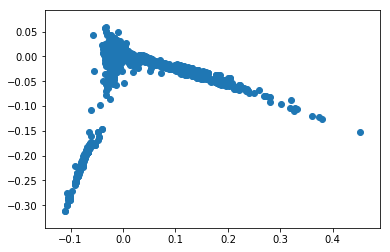

In [37]:
embedded_prods = kpca_model.transform(prod_vectors)
plt.scatter(embedded_prods[:,0], embedded_prods[:,1])

In [38]:
embedded_prods

array([[-0.00723311,  0.00633656],
       [-0.00504784,  0.0049597 ],
       [ 0.1222633 , -0.03662505],
       ..., 
       [-0.00573147,  0.01088439],
       [-0.00394185,  0.00915239],
       [-0.00245405,  0.00892002]])

#  Cluster To Find Vaccum

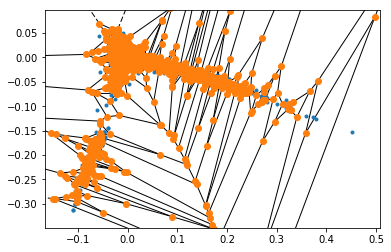

In [86]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(embedded_prods)

voronoi_plot_2d(vor)
plt.show()



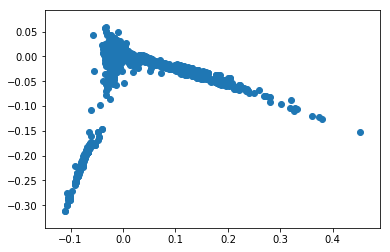

In [89]:
plt.scatter(embedded_prods[:,0], embedded_prods[:,1])


In [41]:
closest_prods = []
for vert in vor.vertices:
    closest_prod = 9999999999
    for point in embedded_prods:
        distance = np.linalg.norm(vert - point)
        if distance < closest_prod:
            closest_prod = distance
    closest_prods.append(closest_prod)

#  FInd Empty Space Proposals

In [44]:
#  only keep the top 2000 largest spaces
top_3000_empty_spaces = sorted(np.hstack((vor.vertices, np.atleast_2d(closest_prods).T)), 
                               key=lambda x: -x[2])[:3000]
top_3000_empty_spaces = np.atleast_2d(top_3000_empty_spaces)
top_3000_empty_spaces[:3]

array([[ 1.42322199,  3.01622604,  3.29445932],
       [-1.18932515,  0.05790211,  1.1321522 ],
       [ 0.56989645,  0.75216309,  0.87653677]])

In [45]:
#  then I need to weight them based on how close they are to the mean of the data

In [46]:
all_prod_mean = embedded_prods.mean(axis=0)

distances_to_all_prod_mean = []
for empty_space_center in top_3000_empty_spaces:
    distance = np.linalg.norm(empty_space_center[:2] - all_prod_mean)
    distances_to_all_prod_mean.append(distance)

In [47]:
all_prod_mean

array([ -9.88880865e-15,  -1.07576922e-14])

In [48]:
distances_to_all_prod_mean

[3.335143228331038,
 1.1907337902976534,
 0.94367964800576343,
 0.88195679949671146,
 0.66684099547264142,
 0.67495358957432505,
 0.60268496733248822,
 0.49336748051898038,
 0.61434956431376109,
 0.55474620459078128,
 0.57512935714127655,
 0.38175203587925138,
 0.48351460409934244,
 0.48015642305615619,
 0.36069427218289352,
 0.35422813666362402,
 0.49638472430091168,
 0.41462339394630759,
 0.39242664432026841,
 0.39019846380520695,
 0.38241737739016052,
 0.36752153472980853,
 0.35851476481911981,
 0.34179090800142015,
 0.34115667597991045,
 0.50520031473559823,
 0.2424415486763746,
 0.29475449733345699,
 0.28738878691337261,
 0.33764408857636174,
 0.22045680591199662,
 0.26881747621817265,
 0.25011058033259514,
 0.24505808426809159,
 0.23753630888073202,
 0.21219707379924538,
 0.21162044678534395,
 0.2266308915277972,
 0.19023524883510803,
 0.24095122851537085,
 0.18467163101550838,
 0.17595391007581007,
 0.20975516269610694,
 0.1377227537509432,
 0.13217248208027935,
 0.2740940984890

In [56]:
min_dist = min(distances_to_all_prod_mean)
max_dist = max(distances_to_all_prod_mean)

In [57]:
tmp_w = max_dist - distances_to_all_prod_mean
tmp_w /= max_dist
tmp_w /= sum(tmp_w)
tmp_w

array([ 0.        ,  0.00021862,  0.00024381, ...,  0.00033877,
        0.00033908,  0.00033865])

In [58]:
#  select a few randomy weighted by distance to cluster mean
new_prod_proposal_indexes = np.random.choice(range(len(top_3000_empty_spaces)), p=tmp_w, size=200)



#  Extract and Save Products

In [59]:
new_prod_proposals_emedded = top_3000_empty_spaces[new_prod_proposal_indexes, :2]

In [60]:
new_prod_proposals = kpca_model.inverse_transform(new_prod_proposals_emedded)
new_prod_proposals

array([[ 0.00135838,  0.00183371, -0.009707  , ...,  0.03653895,
        -0.02925965,  0.02478035],
       [ 0.00594393,  0.00850008,  0.02104472, ...,  0.03413865,
        -0.09717194,  0.0492172 ],
       [ 0.00546525,  0.00411323,  0.00125247, ...,  0.02401593,
         0.12196591,  0.01799313],
       ..., 
       [ 0.00548301,  0.00601282,  0.00900118, ...,  0.03007243,
         0.0002417 ,  0.03382236],
       [ 0.00544333,  0.00570813,  0.00763594, ...,  0.02940392,
         0.01494998,  0.03168909],
       [ 0.00557891,  0.00640384,  0.01087874, ...,  0.03068837,
        -0.01451046,  0.03621742]])

In [77]:
new_prod_theshold_offset = 0.02  #  to force sparsity
new_prod_proposals_bin = (new_prod_proposals > (theshold_inv_value + new_prod_theshold_offset)).astype(int)
new_prod_proposals_bin

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
print(new_prod_proposals_bin.shape)
print(len(new_prod_proposals_bin.sum(axis=1)))
new_prod_proposals_bin.sum(axis=1)

(200, 1000)
200


array([ 93,  67,  36,  16,   6,  52,  56,  28,   6,   2,  14,   3,   6,
         1,   4,   7,   8,  77,   0,  30,   4,   4,  13,   1,   7,   4,
         8,  19,  91,   4,  20,  19,  17,  28,  15,   4,   4,  63,  22,
        12,   8,   5,  20,  11, 145,   5,   6,  74,   8,   7,  12,  12,
         6,  11,  20,  43,  56,  29,   7,  53,   0,  38,  43,   6,  14,
        52,  73,   0,   1,  57,   4,   4,  30,  23,  14,   4,   7,  64,
        11,   0,  52,  13,  56,  61,   8,   1,   4,   6,   4,   6,  51,
        70,   1,  14,  12,  74,   6,  16, 377,  41,  36,   2,   9,   7,
        32,  12,   2,  57, 145,   3,   0,  59,  13,  71,  32,  16,   1,
        19,   9,  87,  12,   6,   1,   4,  25,  64,   9,  14,  92,  42,
         4,  29,   6,  65,  10,  94,  46,   6,  11,   0,   6,  13,  60,
        51,   6,   6, 449,   6,  51,  39,  41, 103,  11,  16,  57,   1,
        34,   1,  25,   7,   6,  20,  20,   0,  70,  19,  14,   0,  15,
         6,  22,   8,   7,  93,  93,  22,   4, 153,   8,   4,   

In [79]:
new_prod_proposals_bin_df = pd.DataFrame(new_prod_proposals_bin)
new_prod_proposals_bin_df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Save To File

In [80]:
new_prod_proposals_bin_df.to_excel('new_product_proposals.xlsx')